In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

uof = pd.read_csv('everything.csv')
uof.head()

C:\Users\Wei Xun\AppData\Local\Temp\ipykernel_1076\3684461729.py:5: DtypeWarning: Columns (38,39,40,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,101,141,181,221,274) have mixed types. Specify dtype option on import or set low_memory=False.
  uof = pd.read_csv('everything.csv')


,IncidentDate,IncidentTime,Incident Location: Street/Highway,Incident Location: Public Transport,Incident Location: Retail Premises,"Incident Location: Open ground (e.g. park, car park, field)",Incident Location: Licensed Premises,Incident Location: Sports or Event Stadia,Incident Location: Hospital/A&E (non-mental-health setting),Incident Location: Mental Health Setting,...,SubjectMedProvided,Outcome: Made off/escaped,Outcome: Arrested,Outcome: Hospitalised,Outcome: Detained - Mental Health Act,Outcome: Fatality,Outcome: Other,Outcome: No Further Action,Date,Average Score
0,2023-04-01,00:15:00,No,No,No,No,No,No,No,No,...,NaN,No,No,No,Yes,No,No,No,2023-06-30,0.6000
1,2023-04-01,00:30:00,Yes,No,No,No,No,No,No,No,...,NaN,No,No,No,No,No,No,Yes,2023-06-30,0.5271
2,2023-04-01,01:00:00,No,No,No,No,No,No,Yes,No,...,NaN,No,No,Yes,No,No,No,No,2023-06-30,0.4714
3,2023-04-01,00:30:00,Yes,No,No,No,No,No,No,No,...,NaN,No,Yes,No,No,No,No,No,2023-06-30,0.4414
4,2023-04-01,12:20:00,Yes,No,No,No,No,No,No,No,...,NaN,No,Yes,No,No,No,No,No,2023-06-30,0.4414


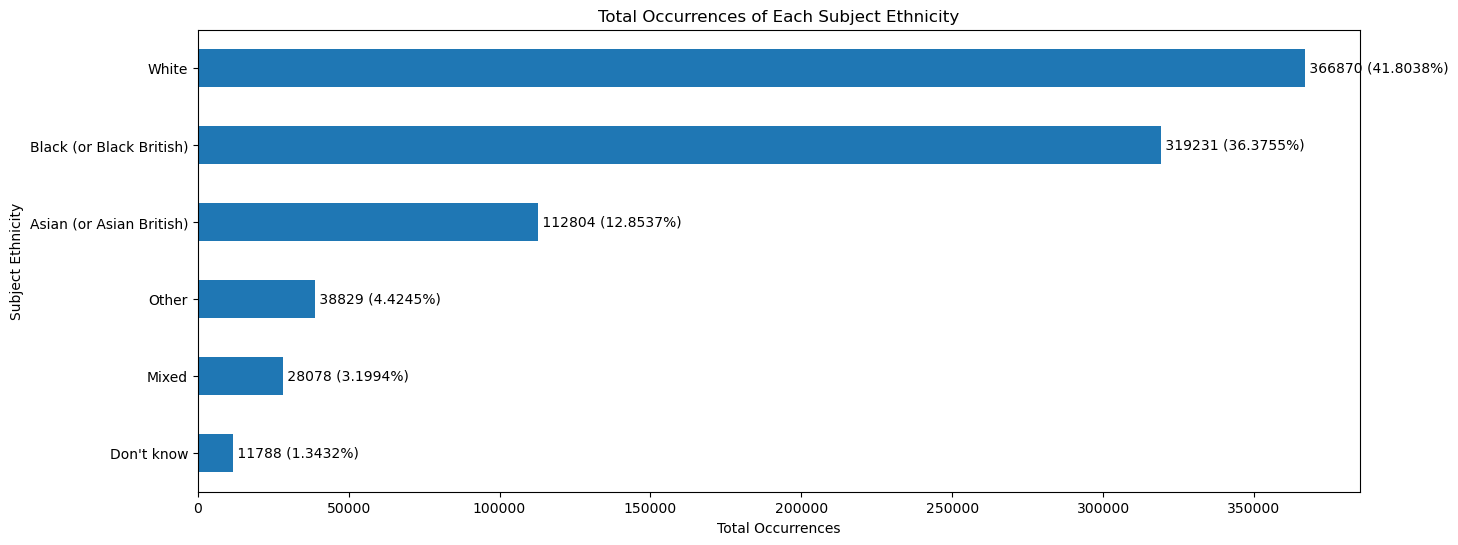

In [2]:
uof.loc[uof.SubjectEthnicity == 'Chinese','SubjectEthnicity'] = 'Asian (or Asian British)'
temp = uof[['SubjectEthnicity']]

ethnicity_counts_temp = temp['SubjectEthnicity'].value_counts()
total_occurrences_temp = temp['SubjectEthnicity'].count()
sorted_counts_temp = ethnicity_counts_temp.sort_values(ascending=True)

ax = sorted_counts_temp.plot(kind='barh', figsize=(15, 6), title='Total Occurrences of Each Subject Ethnicity')
ax.set_xlabel('Total Occurrences')
ax.set_ylabel('Subject Ethnicity')

for i, value in enumerate(sorted_counts_temp):
    ax.text(value, i, f' {value} ({value/total_occurrences_temp:.4%})', va='center')

plt.show()

C:\Users\Wei Xun\AppData\Local\Temp\ipykernel_1076\3539898279.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[outcome_cols] = (temp[outcome_cols] == 'Yes').astype(int)


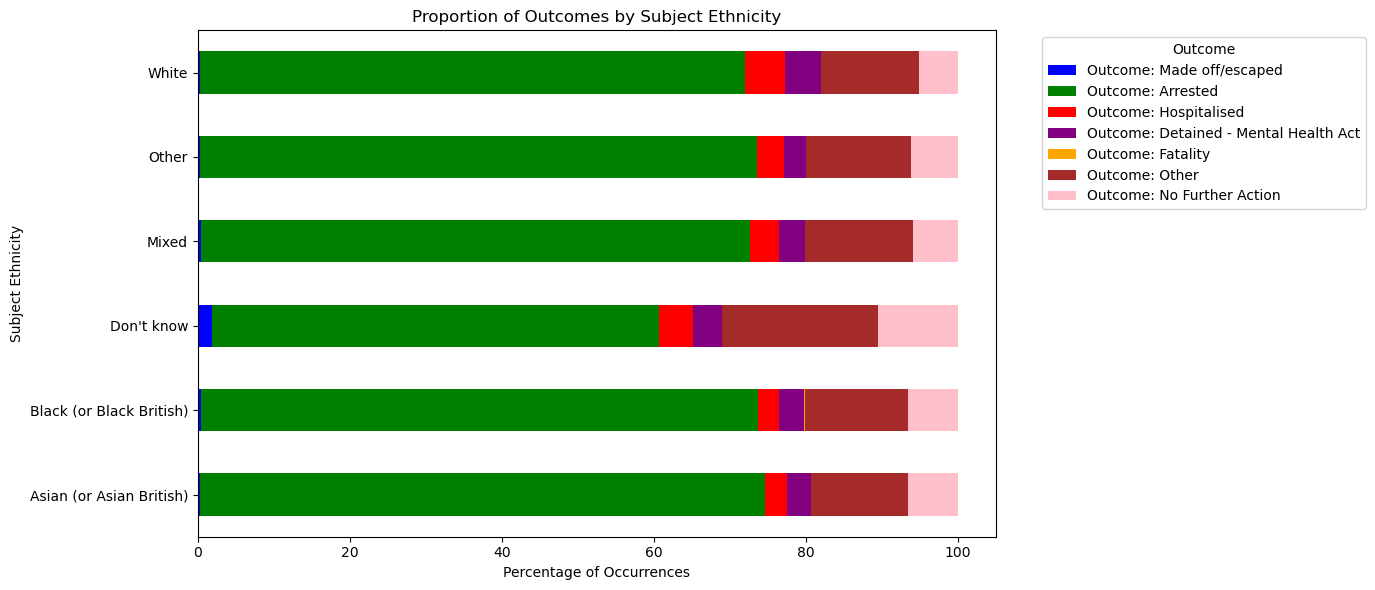

In [3]:
temp = uof[['SubjectEthnicity'] + [col for col in uof.columns if col.startswith('Outcome')]]

outcome_cols = [col for col in temp.columns if col.startswith("Outcome:")]
temp[outcome_cols] = (temp[outcome_cols] == 'Yes').astype(int)
outcome_counts = temp.groupby('SubjectEthnicity')[outcome_cols].sum()
percentage_outcome_counts = outcome_counts.div(outcome_counts.sum(axis=1), axis=0) * 100

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink']

percentage_outcome_counts.plot(kind='barh', stacked=True, figsize=(14, 6), color=colors)
plt.title('Proportion of Outcomes by Subject Ethnicity')
plt.ylabel('Subject Ethnicity')
plt.xlabel('Percentage of Occurrences')
plt.yticks()
plt.legend(title="Outcome", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

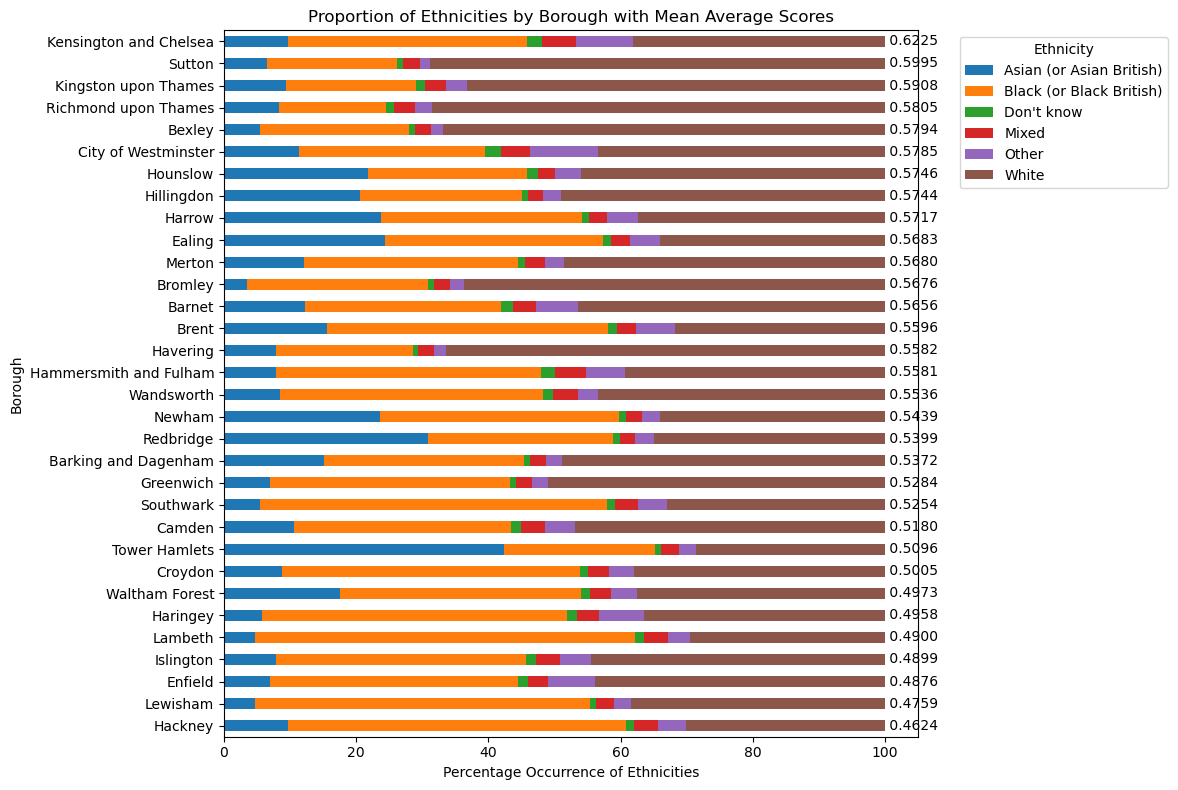

In [4]:
temp = uof[['SubjectEthnicity', 'Borough', 'Average Score']]

ethnicity_counts = temp.groupby(['Borough', 'SubjectEthnicity']).size().unstack(fill_value=0)
borough_totals = ethnicity_counts.sum(axis=1)
ethnicity_percentage = ethnicity_counts.div(borough_totals, axis=0) * 100

mean_scores = temp.groupby('Borough')['Average Score'].mean()

combined_data = ethnicity_percentage.join(mean_scores).sort_values(by='Average Score', ascending=True)

fig, ax = plt.subplots(figsize=(12, 8))
combined_data.iloc[:, :-1].plot(kind='barh', stacked=True, ax=ax)

for i, (index, row) in enumerate(combined_data.iterrows()):
    ax.annotate(f' {row["Average Score"]:.4f}', xy=(100, i), va='center')

ax.set_xlabel('Percentage Occurrence of Ethnicities')
ax.set_ylabel('Borough')
ax.set_title('Proportion of Ethnicities by Borough with Mean Average Scores')
plt.legend(title='Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [5]:
columns = ['SubjectEthnicity', 'Borough', 'Average Score', 'Date', 'SubjectAge', 'Outcome: Arrested', 'Outcome: No Further Action', 'Outcome: Hospitalised', 'Outcome: Detained - Mental Health Act', 'SubjectInjured']

temp = uof[columns]
grouped = temp.groupby(['Borough', 'Date'])
total_counts = grouped.size()

black_counts = temp[temp['SubjectEthnicity'] == "Black (or Black British)"].groupby(['Borough', 'Date']).size()
percent_black = (black_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageBlack'] = temp.set_index(['Borough', 'Date']).index.map(percent_black)

asian_counts = temp[temp['SubjectEthnicity'] == "Asian (or Asian British)"].groupby(['Borough', 'Date']).size()
percent_asian = (asian_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageAsian'] = temp.set_index(['Borough', 'Date']).index.map(percent_asian)

white_counts = temp[temp['SubjectEthnicity'] == "White"].groupby(['Borough', 'Date']).size()
percent_white = (white_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageWhite'] = temp.set_index(['Borough', 'Date']).index.map(percent_white)

underaged_counts = temp[(temp['SubjectAge'] == "0-10") | (temp['SubjectAge'] == "11-17")].groupby(['Borough', 'Date']).size()
percent_underaged = (underaged_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageUnder18'] = temp.set_index(['Borough', 'Date']).index.map(percent_underaged)

over50_counts = temp[(temp['SubjectAge'] == "50-64") | (temp['SubjectAge'] == "65 and over")].groupby(['Borough', 'Date']).size()
percent_over50 = (over50_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageOver50'] = temp.set_index(['Borough', 'Date']).index.map(percent_over50)

Arrested_counts = temp[(temp['Outcome: Arrested'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_Arrested = (Arrested_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageArrested'] = temp.set_index(['Borough', 'Date']).index.map(percent_Arrested)

Hospitalised_counts = temp[(temp['Outcome: Hospitalised'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_Hospitalised = (Hospitalised_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageHospitalised'] = temp.set_index(['Borough', 'Date']).index.map(percent_Hospitalised)

Detained_counts = temp[(temp['Outcome: Detained - Mental Health Act'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_Detained = (Detained_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageDetainedMHA'] = temp.set_index(['Borough', 'Date']).index.map(percent_Detained)

firearmsaimed_counts = temp[(temp['SubjectInjured'] == "Yes")].groupby(['Borough', 'Date']).size()
percent_firearmsaimed = (firearmsaimed_counts / total_counts * 100).reindex(grouped.indices, fill_value=0)
temp['PercentageSubjectInjured'] = temp.set_index(['Borough', 'Date']).index.map(percent_firearmsaimed)


temp = temp.drop(columns=['SubjectEthnicity', 'SubjectAge', 'Outcome: Arrested', 'Outcome: No Further Action', 'Outcome: Hospitalised', 'Outcome: Detained - Mental Health Act', 'SubjectInjured'])
temp = temp.fillna(0)
temp.drop_duplicates(inplace=True)
temp.head(50)

C:\Users\Wei Xun\AppData\Local\Temp\ipykernel_1076\1569684518.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['PercentageBlack'] = temp.set_index(['Borough', 'Date']).index.map(percent_black)
C:\Users\Wei Xun\AppData\Local\Temp\ipykernel_1076\1569684518.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['PercentageAsian'] = temp.set_index(['Borough', 'Date']).index.map(percent_asian)
C:\Users\Wei Xun\AppData\Local\Temp\ipykernel_1076\1569684518.py:17: SettingWithCopyWarning: 
A value is tryi

,Borough,Average Score,Date,PercentageBlack,PercentageAsian,PercentageWhite,PercentageUnder18,PercentageOver50,PercentageArrested,PercentageHospitalised,PercentageDetainedMHA,PercentageSubjectInjured
0,Harrow,0.6000,2023-06-30,30.384615,21.538462,38.076923,8.076923,9.038462,68.076923,5.384615,7.307692,1.538462
1,City of Westminster,0.5271,2023-06-30,33.292333,10.619106,36.408364,12.751128,7.585076,65.108651,4.387044,4.469045,2.009020
2,Redbridge,0.4714,2023-06-30,26.739427,33.424284,33.969986,11.869031,5.866303,62.073670,7.912688,7.094134,2.728513
3,Tower Hamlets,0.4414,2023-06-30,25.655977,33.527697,33.381924,10.495627,8.017493,62.536443,3.425656,3.790087,1.967930
5,Enfield,0.4643,2023-06-30,41.471215,7.249467,40.191898,15.565032,7.782516,73.560768,4.157783,4.264392,3.624733
6,Hammersmith and Fulham,0.4671,2023-06-30,36.172566,9.955752,38.163717,11.061947,10.840708,66.482301,4.756637,6.305310,4.867257
7,Newham,0.4386,2023-06-30,37.851852,24.296296,31.851852,17.925926,7.925926,72.814815,3.111111,2.814815,2.888889
10,Hillingdon,0.6029,2023-06-30,23.365786,21.974965,46.731572,15.020862,8.205841,68.428373,4.867872,6.954103,2.642559
12,Waltham Forest,0.3829,2023-06-30,38.177015,18.229855,36.195509,15.984148,8.058124,71.466314,2.642008,3.963012,3.038309
13,Brent,0.5086,2023-06-30,38.378378,14.504505,34.774775,15.225225,8.018018,64.684685,3.513514,4.324324,3.333333


In [25]:
import statsmodels.api as sm

X = temp[['PercentageUnder18', 'PercentageOver50', 'PercentageArrested', 'PercentageHospitalised', 'PercentageDetainedMHA', 'PercentageSubjectInjured']]

#X = temp[['PercentageBlack', 'PercentageWhite', 'PercentageAsian', 'PercentageUnder18', 'PercentageOver50', 'PercentageArrested', 'PercentageHospitalised', 'PercentageDetainedMHA', 'PercentageSubjectInjured']]
y = temp['Average Score']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Average Score   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     85.92
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           2.96e-84
Time:                        15:45:58   Log-Likelihood:                 1294.8
No. Observations:                 864   AIC:                            -2576.
Df Residuals:                     857   BIC:                            -2542.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   